# Data Loading

## Dowload data

Data yang digunakan pada project ini adalah data terkait kebiasaan siswa yang bisa jadi berdampak pada kemampuan siswa, berasal dari kaggle dengan judul *Student Performance (Multiple Linear Regression)* berisi 10.000 sampel dan Performance Index sebagai Target Datanya

In [ ]:
# from google.colab import files
# files.upload()  # Upload kaggle.json yang tadi diunduh

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# #!/bin/bash
# !kaggle datasets download nikhil7280/student-performance-multiple-linear-regression
# !unzip student-performance-multiple-linear-regression.zip

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
License(s): other
student-performance-multiple-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  student-performance-multiple-linear-regression.zip
replace Student_Performance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Student_Performance.csv  


import library yang diperlukan untuk proyek ini

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import dataset dan cek 5 baris teratas

In [ ]:
df = pd.read_csv('/content/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Exploratory Data Analysis

Exploratory data dilakukan untuk melihat kondisi distribusi data baik yang bertipe kategorikal atau numerikal.

## Deskripsi Variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


## Checking Missing, Duplicate Values and Outlier

Hasil pengecekan nilai yang hilang menunjukan bahwa tidak ada satupun kolom yang memiliki data yang hilang

In [ ]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


Sedangkan untuk pengecekan data duplikat menunjukan bahwa ada 127 data duplikat yang kemudian bisa dihilangkan.

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

127
0


EDA yang dilakukan untuk melihat kondisi dari setiap kolom yang ada seperti tipe data, jumlah sampel, nama kolom, mean, std dan masih banyak.

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<ipython-input-8-701bb8379c81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='Set2')
<ipython-input-8-701bb8379c81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='Set2')
<ipython-input-8-701bb8379c81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='Set2')
<ipython-input-8-701bb8379c81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same eff

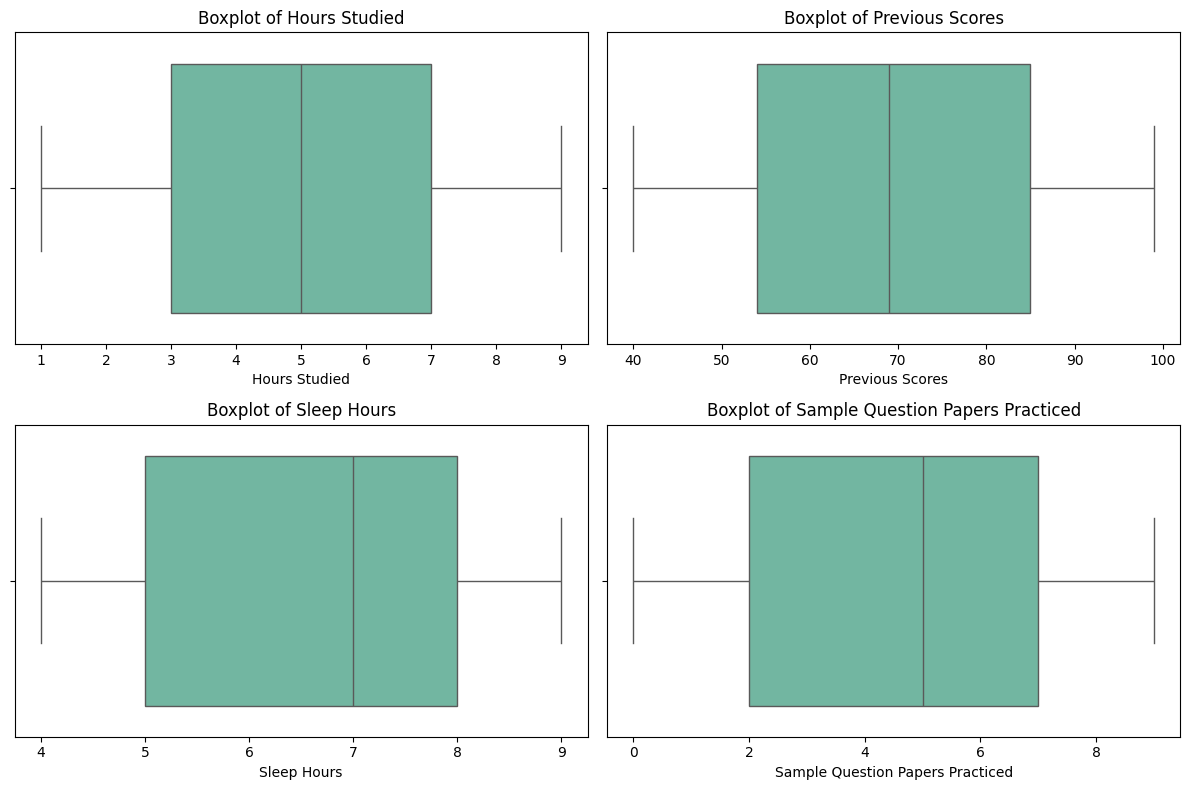

In [ ]:
target_column = 'Performance Index'

numerical_cols = df.select_dtypes(include='number').drop(columns=[target_column])

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col, palette='Set2')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

data terlihat tidak memiliki data outlier

## Univariate Analysis

Univariate Analysis dilakukan untuk melihat distribusi satu kolom tanpa ada hubungan dengan kolom lain

Membuat diagram batang untuk melihat distribusi data kategorikal yaitu *Extracurricular Activities*. Diagram menunjukan bahwa persebaran data tersebut seimbang

Text(0.5, 1.0, 'Distribution of Extracurricular Activities')

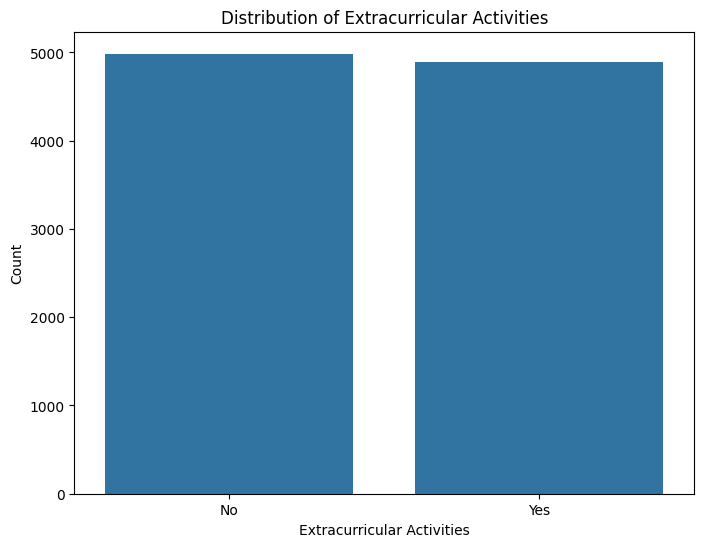

In [ ]:
bar_data = df['Extracurricular Activities'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=bar_data.index, y=bar_data.values)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Count')
plt.title('Distribution of Extracurricular Activities')

Selanjutnya membuat histogram untuk melihat persebaran data numerikal. Berdasarkan bagan-bagan tersebut dapat dilihat bahwa tidak ada ketimpangan pada masing-masing data

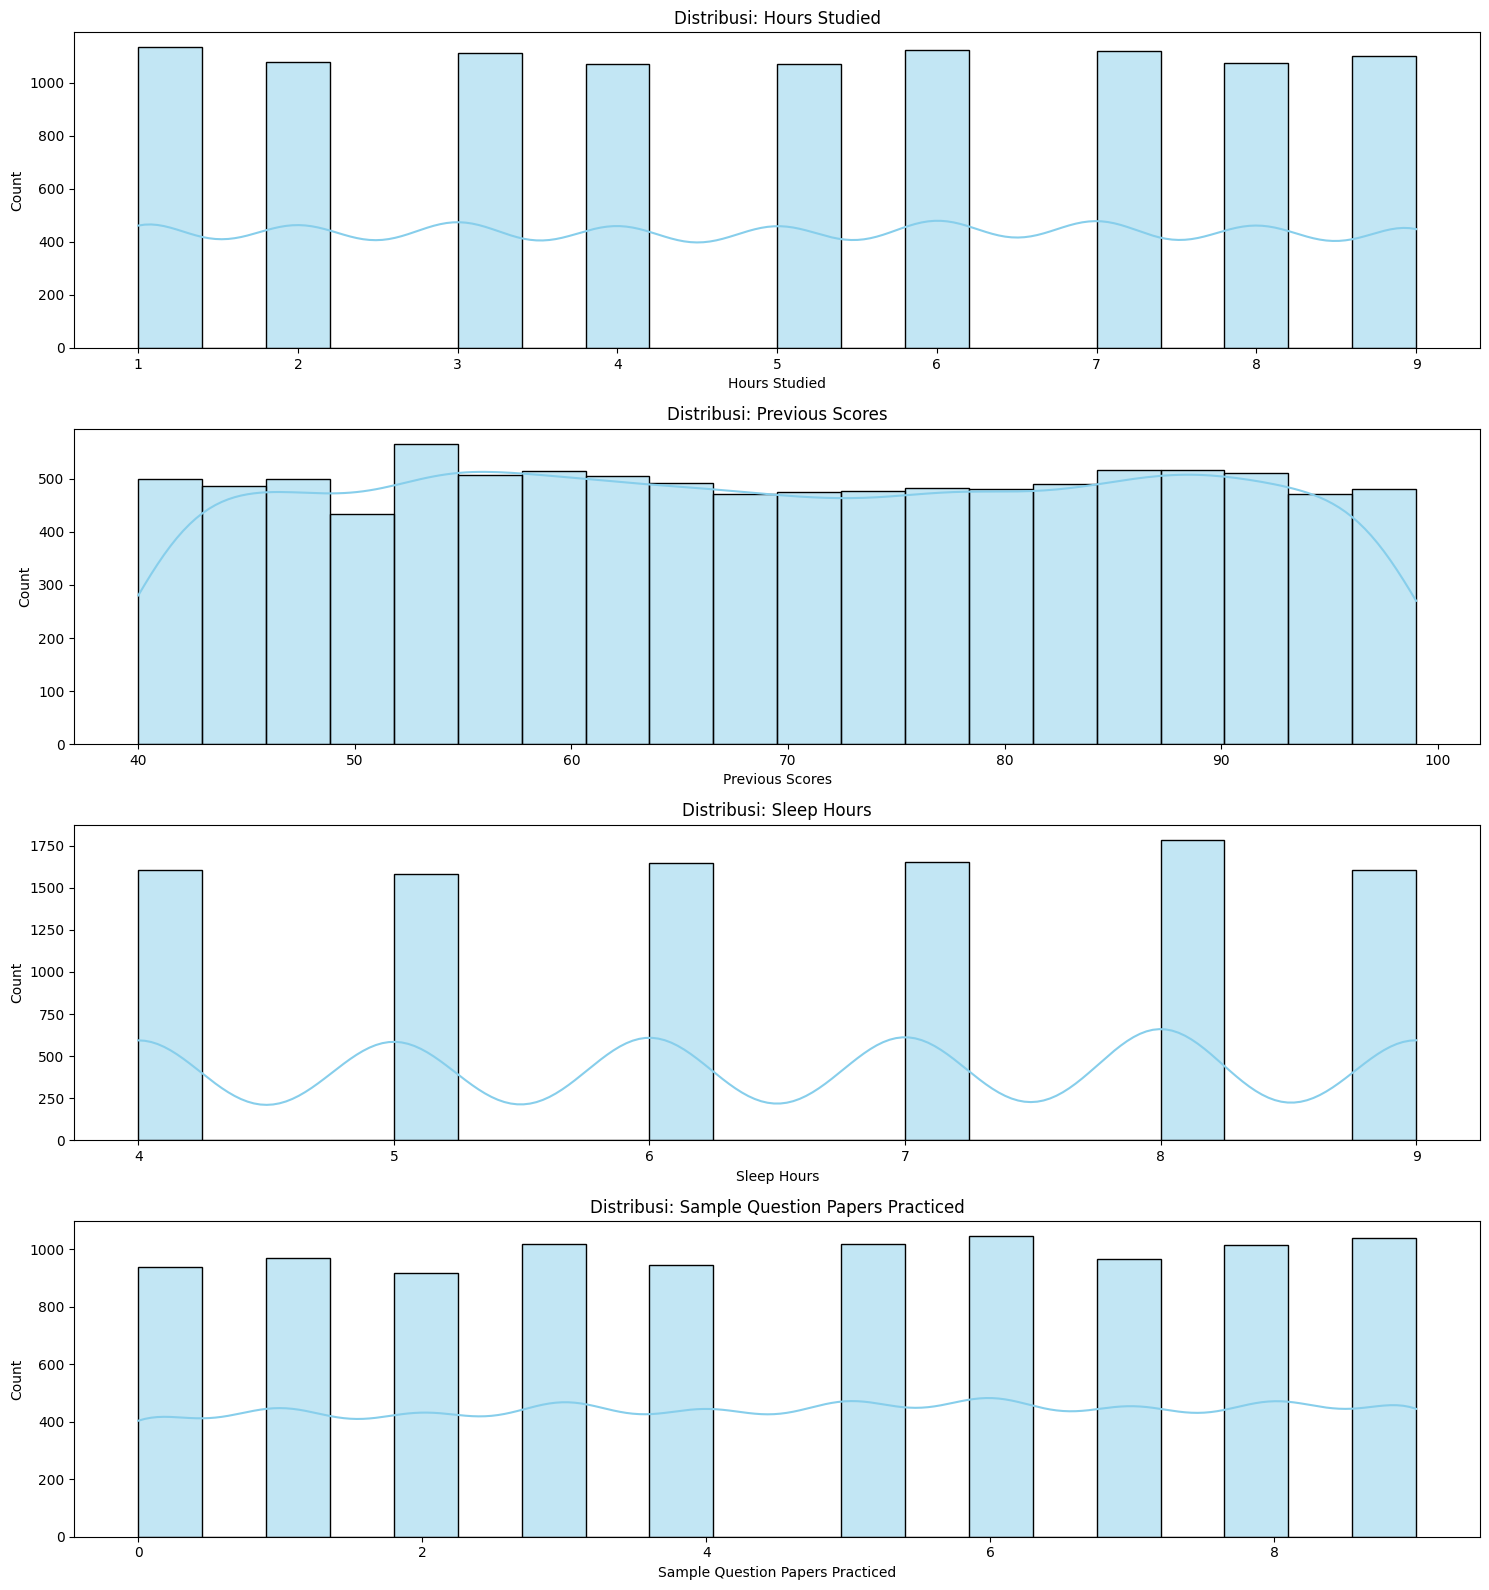

In [ ]:
plt.figure(figsize=(15, len(numerical_cols.columns) * 4))
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(len(numerical_cols.columns), 1, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

## Multivariate Analysis

Multivariate Analysis dilakukan untuk melihat hubungan antara satu kolom dengan kolom lain

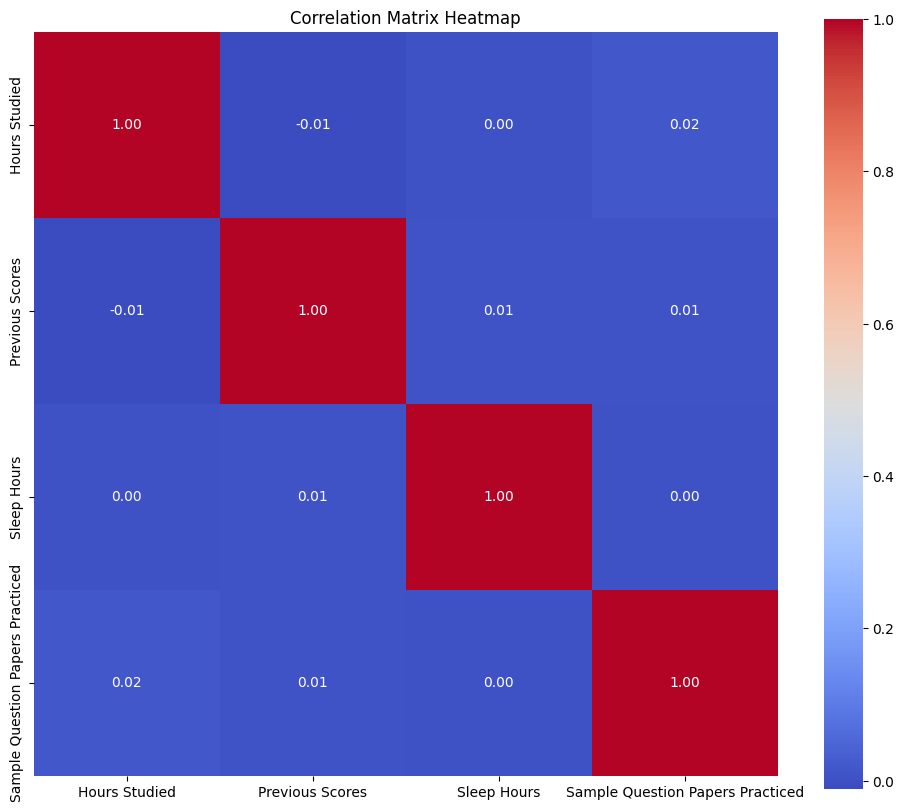

In [ ]:
target_column = 'Performance Index'

numerical_cols = df.select_dtypes(include='number').drop(columns=[target_column]).columns.tolist()

plt.figure(figsize=(12, 10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Data Prepration

Menyiapkan Data untuk digunakan dalam proses pembangunan model machine learning

## Normalisasi

Berikut merupakan proses standarisasi untuk data-data numerikal yang terdapat pada dataset yang digunakan selain data target.

In [ ]:
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,Yes,1.0,0.111111,91.0
1,0.375,0.711864,No,0.0,0.222222,65.0
2,0.875,0.186441,Yes,0.6,0.222222,45.0
3,0.500,0.203390,Yes,0.2,0.222222,36.0
4,0.750,0.593220,No,0.8,0.555556,66.0


## Transformasi

Selanjutnya ada tranformasi data menggunakan label encoder untuk merubah data kategorikal yang diisi dengan nilai huruf contoh nya "yes" dan "no" menjadi angka yang setiap angka mewakilkan satu kategori

In [ ]:
label_encoder = LabelEncoder()
df['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,1,1.0,0.111111,91.0
1,0.375,0.711864,0,0.0,0.222222,65.0
2,0.875,0.186441,1,0.6,0.222222,45.0
3,0.500,0.203390,1,0.2,0.222222,36.0
4,0.750,0.593220,0,0.8,0.555556,66.0


## Data Splitting

Bertujuan untuk membagi data dengan rasio tertentu yang mana sebagian akan digunakan untuk melatih/membangun model machine learning sedangkan sebagian yang lain akan digunakan untuk menguji model yang sudah dibangun.

In [ ]:
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development

Membangun model machine learning untuk data dengan data yang sudah disiapkan sebelumnya.

menggunakan random forest

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

menggunakan xgboost

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Evaluasi Model


mengevaluasi hasil kinerja model yang sudah dibangun menggunakan metrik


1.   Mean Square Error
2.   Mean Absolute Erro
3.   R-Squared



In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Inisialisasi list hasil evaluasi
results = []

# Evaluasi Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

results.append({
    'Model': 'Random Forest',
    'Train MSE': mean_squared_error(y_train, y_train_pred_rf),
    'Test MSE': mean_squared_error(y_test, y_test_pred_rf),
    'Train MAE': mean_absolute_error(y_train, y_train_pred_rf),
    'Test MAE': mean_absolute_error(y_test, y_test_pred_rf),
    'Train R²': r2_score(y_train, y_train_pred_rf),
    'Test R²': r2_score(y_test, y_test_pred_rf)
})

# Evaluasi XGBoost
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

results.append({
    'Model': 'XGBoost',
    'Train MSE': mean_squared_error(y_train, y_train_pred_xgb),
    'Test MSE': mean_squared_error(y_test, y_test_pred_xgb),
    'Train MAE': mean_absolute_error(y_train, y_train_pred_xgb),
    'Test MAE': mean_absolute_error(y_test, y_test_pred_xgb),
    'Train R²': r2_score(y_train, y_train_pred_xgb),
    'Test R²': r2_score(y_test, y_test_pred_xgb)
})

# Buat DataFrame dari hasil
metrics_df = pd.DataFrame(results)

# Tampilkan
metrics_df.head()

,Model,Train MSE,Test MSE,Train MAE,Test MAE,Train R²,Test R²
0,Random Forest,0.931158,5.673413,0.749827,1.905679,0.997470,0.984756
1,XGBoost,2.511904,5.124343,1.241374,1.807403,0.993175,0.986231


Berdasarkan hasil dari tiap-tiap metriks pada data test, XGBoost menunjukan keunggulan yang dibuktikan dengan error yang lebih rendah pada MAE dan MSE dan R2 yang lebih tinggi

In [ ]:
importance = xgb_model.feature_importances_

# Buat DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Tampilkan
feat_importance_df

,Feature,Importance
1,Previous Scores,0.813823
0,Hours Studied,0.177658
3,Sleep Hours,0.003936
4,Sample Question Papers Practiced,0.002449
2,Extracurricular Activities,0.002135


fungsi feature_importances_ akan menampilkan nilai kepentingan masing-masing fitur pada dataset. disini kita lihat yang paling berpengaruh ke indeks performa adalah Previous Scores, kedua Hours Studied, dan terakhir sleep hours